<a href="https://colab.research.google.com/github/shahdevansh28/CE122_Shah_Devansh_ML/blob/main/ML_Lab11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Part-A

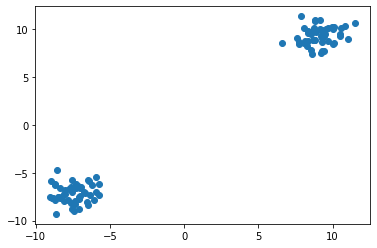

In [ ]:
import sys, os
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
X,y = make_blobs(n_samples=100,centers=2)

# print(X)
# print(y)


# plotting scatters
plt.scatter(X[:,0],X[:,1])
plt.show()

In [ ]:
X_train, X_test,y_train, y_test = train_test_split(X,y ,random_state=104, test_size=0.20)

# print(X_test.shape)

In [ ]:
# Create a linear SVM classifier
clf = svm.SVC(kernel='linear')

clf.fit(X_train,y_train)

SVC(kernel='linear')

In [ ]:
## Plot decision function on training and test data
plot_decision_function(clf)

NameError: ignored

In [ ]:
# Make predictions on unseen test data
clf_predictions = clf.predict(X_test)
print("Accuracy: {}%".format(clf.score(X_test, y_test) * 100))


print(confusion_matrix(clf_predictions,y_test))

Accuracy: 100.0%
[[12  0]
 [ 0  8]]


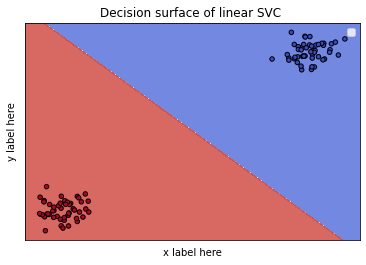

In [ ]:
def make_meshgrid(x, y, h=.02):
  x_min, x_max = x.min() - 1, x.max() + 1
  y_min, y_max = y.min() - 1, y.max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  out = ax.contourf(xx, yy, Z, **params)
  return out


fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20,edgecolors='k')
ax.set_ylabel('y label here')
ax.set_xlabel('x label here')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

Part-B

In [ ]:
#Import scikit-learn dataset library
from sklearn import datasets
#Load dataset
cancer = datasets.load_breast_cancer()

# print the names of the 13 features
print(cancer.feature_names)
# print the label type of cancer('malignant' 'benign')
print(cancer.target_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


In [ ]:
# print data(feature)shape
print(cancer.data.shape)

# print the cancer labels (0:malignant, 1:benign)
print(cancer.target)


(569, 30)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 

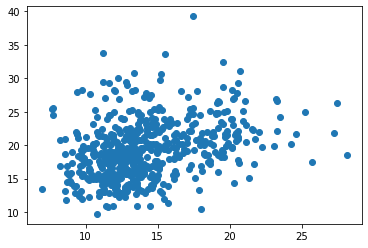

In [ ]:
plt.scatter(cancer.data[:,0],cancer.data[:,1])
plt.show()

In [ ]:
X_train, X_test,y_train, y_test = train_test_split(cancer.data,cancer.target,random_state=104, test_size=0.20)

In [ ]:
#Import svm model
from sklearn import svm
#Create a svm Classifier
clf = clf = svm.SVC(kernel='linear')
#Train the model using the training sets
clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9385964912280702


In [ ]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))
# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.9558823529411765
Recall: 0.9420289855072463


Implement SVM classifier on MNIST dataset, compare the performance of linear, poly-
nomial and RBF kernels.

In [ ]:
from keras.datasets import mnist


(train_X, train_y), (test_X, test_y) = mnist.load_data()


print(train_X.shape)
print(train_y)

(60000, 28, 28)
[5 0 4 ... 5 6 8]


In [ ]:
from sklearn import svm
#Create a svm Classifier
clf = clf = svm.SVC(kernel='linear')
#Train the model using the training sets
clf.fit(train_X,train_y)
#Predict the response for test dataset
# y_pred = clf.predict(X_test)

ValueError: ignored